# Designing Self-driving Earbuds - Overview

with AugmentedHearing

# Comparison

Here we have an example of the output of AugmentedHearing and DeepFilterNet.

We use the original file

In [ ]:
import IPython
### FILE WITH NOISE
IPython.display.Audio("./Comparison AH vs stock DF/SNR-5.wav")

Output of AugmentedHearing model

In [ ]:
### PATH TO Augmented Hearing off-the-shelf output file
IPython.display.Audio("./Comparison AH vs stock DF/SNR-5_AugmentedHearing.wav")

Output of DeepFilterNet

In [ ]:
### PATH TO DF off-the-shelf output file
IPython.display.Audio("./Comparison AH vs stock DF/SNR-5_DeepFilterNet.wav")

The tests that we have conducted to compare the outputs in the report are in the file 'measures.py'.

# Training DeepFilterNet

The modified model can be found in the file 'deepfilternetreduced.py'.

In order to train the network we set up the environment.

In [ ]:
!pip install deepfilternet
!pip install deepfilternet[train]

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In order to setup the data we first get the paths to the first $$40\cdot500=20000$$ speech files.

In [ ]:
import os

n = 40

toppath =r'PATH TO AUDIO FILES'
list_of_files = []

f = open("paths.txt", "w")
for i in range(n):
	path = toppath + str(500 * i) + "/"
	for root, dirs, files in os.walk(path):
		for file in files:
			list_of_files.append(os.path.join(root,file))
for name in list_of_files:
    f.write(name + "\n")


This produces the file paths.txt.

We then set up the data to HDF5 format.

In [ ]:
!python python DeepFilterNet/scripts/prepare_data.py speech paths.txt train/training_500_samples.hdf5

We do the same with the white noise sample. Here we just create a white_noisepath.txt file with the path to the white noise sample.

In [ ]:
%%file white_noise_path.txt
./data/raw_data_white_noise_sample/white_10s.wav

In [ ]:
python DeepFilterNet/scripts/prepare_data.py noise white_noise_path.txt train/noise.hdf5

We then create a dataset.cfg file which is quite simple

In [ ]:
%%file train/dataset.cfg
{
    "test": [
        [
            "training_20000_samples.hdf5",
            1
        ],
        [
            "noise.hdf5",
            1
        ]
    ],
    "train": [
        [
            "training_20000_samples.hdf5",
            1
        ],
        [
            "noise.hdf5",
            1
        ]
    ],
    "valid": [
        [
            "training_20000_samples.hdf5",
            1
        ],
        [
            "noise.hdf5",
            1
        ]
    ]
}


Training requires editing the installation files of DeepFilterNet and is only possible on Linux per the documentation. The file to be edited is the models.py file (path to this file on the default installation on linux is ~/local/lib/python3.10/site-packages/df) where both instances of deepfilternet3 has to be changed to deepfilternet in order to use the correct model.  Now we can train the network with the command

In [ ]:
!python DeepFilterNet/train.py train/dataset.cfg train model1 

And use it to produce output

In [ ]:
python DeepFilterNet/enhance.py -m model1 -o output test_clips/SNR0.wav

We can then play this file like so:

In [ ]:
### Use newly trained network to produce output
IPython.display.Audio("test_clips/SNR0.wav")

# Metrics

In order to calculate SI-SDR and WB-PESQ for the stock version of DeepFilterNet, DeepFilterNet2 and AugmentedHearings model we can run the following script

In [ ]:
!python measures/measures.py

In order to calculate SI-SDR and WB-PESQ between our trained version of DeepFilterNet and DeepFilterNetReduced on a training sample they have seen during training we can run the following script

In [ ]:
!python measures2/measures.py

In order to calculate SI-SDR and WB-PESQ between our trained version of DeepFilterNet and DeepFilterNetReduced on a training sample they have not seen during training we can run the following script

In [ ]:
!python measures2/measures2.py

# A sample result

Now we can plot the waveform of the audio-files before and after denoising.

/tmp/ipykernel_75/809733245.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal0 = np.fromstring(signal0, dtype=np.int16)
/tmp/ipykernel_75/809733245.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal1 = np.fromstring(signal1, dtype=np.int16)
/tmp/ipykernel_75/809733245.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal2 = np.fromstring(signal2, dtype=np.int16)
/tmp/ipykernel_75/809733245.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal3 = np.fromstring(signal3, dtype=np.int16)


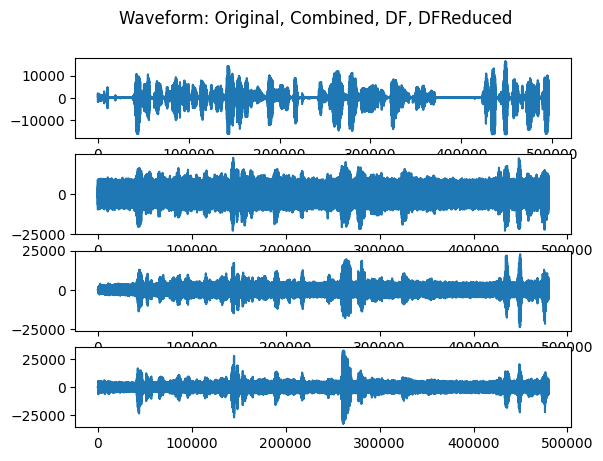

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

### CHANGE PATH FOR f1, f2, f3 corresponding to 
### the three audio files from the folders containing SNR audio files
f0 = wave.open("/work/clean_2_untrained_on.wav", "r")
f1 = wave.open("/work/2SNR-5.wav", "r")
f2 = wave.open("/work/2SNR-5_DF.wav", "r")
f3 = wave.open("/work/2SNR-5_DFR.wav", "r")

signal0 = f0.readframes(-1)
signal0 = np.fromstring(signal0, dtype=np.int16)


signal1 = f1.readframes(-1)
signal1 = np.fromstring(signal1, dtype=np.int16)

signal2 = f2.readframes(-1)
signal2 = np.fromstring(signal2, dtype=np.int16)

signal3 = f3.readframes(-1)
signal3 = np.fromstring(signal3, dtype=np.int16)


fig, axs = plt.subplots(4)
fig.suptitle('Waveform: Original, Combined, DF, DFReduced')
axs[0].plot(signal0)
axs[1].plot(signal1)
axs[2].plot(signal2)
axs[3].plot(signal3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8dce1589-8f65-4c65-b378-e2d4de61893a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>